EE 399
---
Sam Tam
---
4/8/23
---
HW 1
---

In [ ]:
import numpy as np
import scipy.optimize as opt
import matplotlib.pyplot as plt

Part **i**
---

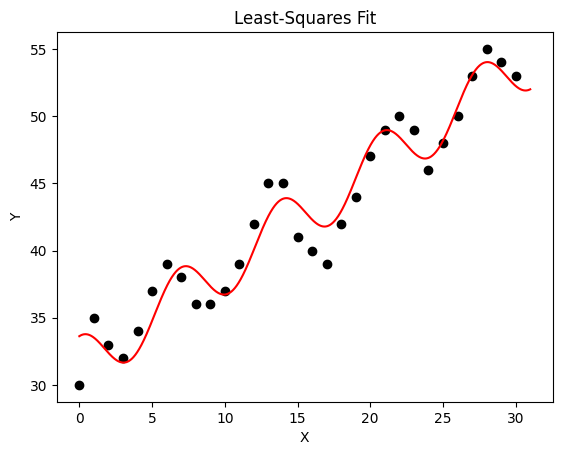

Minimum error: 1.59
A = 2.17
B = 0.91
C = 0.73
D = 31.45


In [ ]:
X=np.arange(0,31)
Y=np.array([30, 35, 33, 32, 34, 37, 39, 38, 36, 36, 37, 39, 42, 45, 45, 41, 40, 39, 42, 44, 47, 49, 50, 49, 46, 48, 50, 53, 55, 54, 53])

def velfit(c, x, y):
    e2 = np.sqrt(np.sum((c[0]*np.cos(c[1]*x)+c[2]*x+c[3]-y)**2)/len(x))
    return e2

v0 = np.array([3, 1*np.pi/4, 2/3, 32])

res= opt.minimize(velfit, v0, args=(X, Y), method='Nelder-Mead')

c = res.x

x2 = np.arange(0, 31.01, 0.01)
y_fit = (c[0]*np.cos(c[1]*x2)+c[2]*x2+c[3])
plt.plot(np.arange(0, 31), Y, 'ko')
plt.plot(x2, y_fit, 'r-')
plt.title("Least-Squares Fit")
plt.xlabel("X")
plt.ylabel("Y")
plt.show()

# Calculate the minimum error between the model and the data
print("Minimum error: {:.2f}".format(res.fun))

# Print the values of A, B, C, and D
print("A = {:.2f}".format(c[0]))
print("B = {:.2f}".format(c[1]))
print("C = {:.2f}".format(c[2]))
print("D = {:.2f}".format(c[3]))

Part **ii**
---

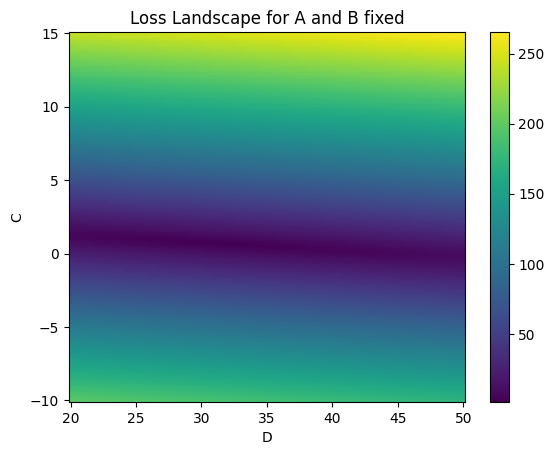

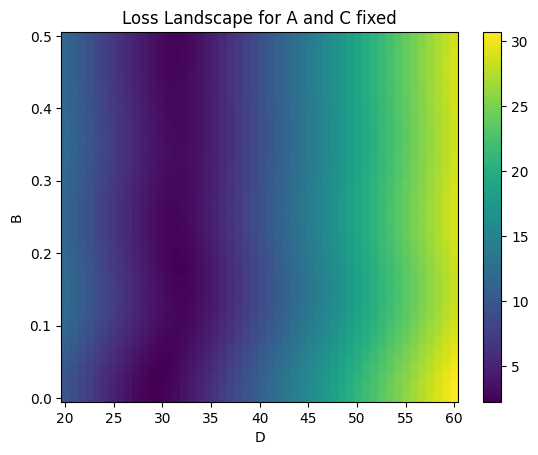

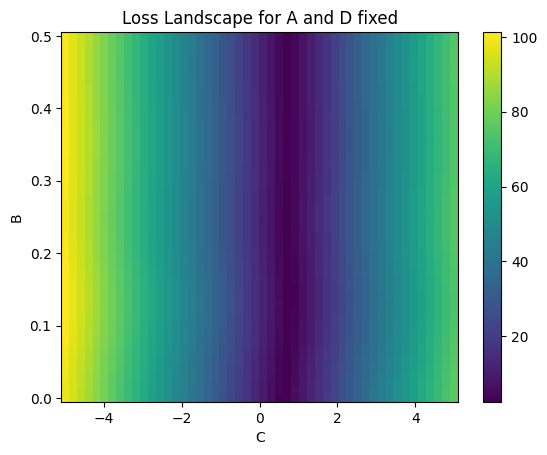

In [ ]:
# Sweep through values of A and B
C_vals = np.linspace(-10, 15, 150)
D_vals = np.linspace(20, 50, 100)
A_vals = np.zeros((len(C_vals), len(D_vals)))
B_vals = np.zeros((len(C_vals), len(D_vals)))
for i, C in enumerate(C_vals):
    for j, D in enumerate(D_vals):
        params = [c[0], c[1], C, D]
        A_vals[i, j] = velfit(params, X, Y)
        B_vals[i, j] = c[1]
plt.figure()
plt.pcolor(D_vals, C_vals, A_vals, shading='auto')
plt.xlabel("D")
plt.ylabel("C")
plt.title("Loss Landscape for A and B fixed")
plt.colorbar()
plt.show()

# Sweep through values of A and C
B_vals = np.linspace(0, 0.5, 50)
D_vals = np.linspace(20, 60, 50)
A_vals = np.zeros((len(B_vals), len(D_vals)))
C_vals = np.zeros((len(B_vals), len(D_vals)))
for i, B in enumerate(B_vals):
    for j, D in enumerate(D_vals):
        params = [c[0], B, c[2], D]
        A_vals[i, j] = velfit(params, X, Y)
        C_vals[i, j] = c[2]
plt.figure()
plt.pcolor(D_vals, B_vals, A_vals, shading='auto')
plt.xlabel("D")
plt.ylabel("B")
plt.title("Loss Landscape for A and C fixed")
plt.colorbar()
plt.show()

# Sweep through values of A and D
B_vals = np.linspace(0, 0.5, 50)
C_vals = np.linspace(-5, 5, 50)
A_vals = np.zeros((len(B_vals), len(C_vals)))
D_vals = np.zeros((len(B_vals), len(C_vals)))
for i, B in enumerate(B_vals):
    for j, C in enumerate(C_vals):
        params = [c[0], B, C, c[3]]
        A_vals[i, j] = velfit(params, X, Y)
        D_vals[i, j] = c[3]
plt.figure()
plt.pcolor(C_vals, B_vals, A_vals, shading='auto')
plt.xlabel("C")
plt.ylabel("B")
plt.title("Loss Landscape for A and D fixed")
plt.colorbar()
plt.show()

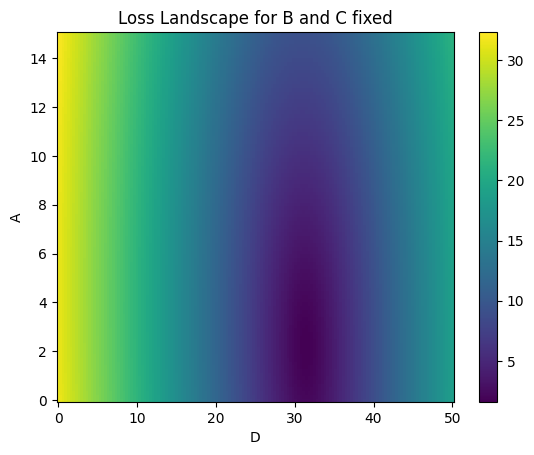

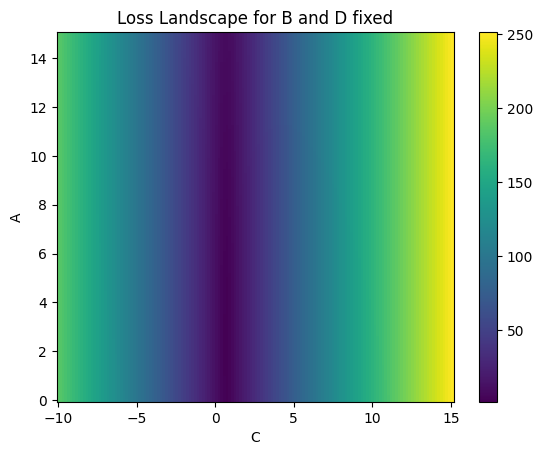

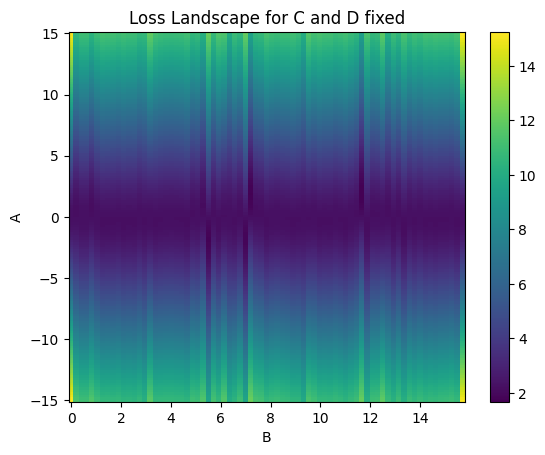

In [ ]:
# Sweep through values of B and C
A_vals = np.linspace(0, 15, 100)
D_vals = np.linspace(0, 50, 150)
B_vals = np.zeros((len(A_vals), len(D_vals)))
C_vals = np.zeros((len(A_vals), len(D_vals)))
for i, A in enumerate(A_vals):
    for j, D in enumerate(D_vals):
        params = [A, c[1], c[2], D]
        B_vals[i, j] = velfit(params, X, Y)
        C_vals[i, j] = c[2]
plt.figure()
plt.pcolor(D_vals, A_vals, B_vals, shading='auto')
plt.xlabel("D")
plt.ylabel("A")
plt.title("Loss Landscape for B and C fixed")
plt.colorbar()
plt.show()

# Sweep through values of B and D
A_vals = np.linspace(0, 15, 100)
C_vals = np.linspace(-10, 15.1, 150)
B_vals = np.zeros((len(A_vals), len(C_vals)))
D_vals = np.zeros((len(A_vals), len(C_vals)))
for i, A in enumerate(A_vals):
    for j, C in enumerate(C_vals):
        params = [A, c[1], C, c[3]]
        B_vals[i, j] = velfit(params, X, Y)
        D_vals[i, j] = c[3]
plt.figure()
plt.pcolor(C_vals, A_vals, B_vals, shading='auto')
plt.xlabel("C")
plt.ylabel("A")
plt.title("Loss Landscape for B and D fixed")
plt.colorbar()
plt.show()

# Sweep through values of C and D
A_vals = np.linspace(-15, 15, 150)
B_vals = np.linspace(0, 10* np.pi/2, 75)
C_vals = np.zeros((len(A_vals), len(B_vals)))
D_vals = np.zeros((len(A_vals), len(B_vals)))
for i, A in enumerate(A_vals):
    for j, B in enumerate(B_vals):
        params = [A, B, c[2], c[3]]
        C_vals[i, j] = velfit(params, X, Y)
        D_vals[i, j] = c[3]
plt.figure()
plt.pcolor(B_vals, A_vals, C_vals, shading='auto')
plt.xlabel("B")
plt.ylabel("A")
plt.title("Loss Landscape for C and D fixed")
plt.colorbar()
plt.show()

Part **iii**
---

/usr/local/lib/python3.9/dist-packages/IPython/core/interactiveshell.py:3553: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)


Training Errors:
Line Error: 2.24
Parabola Error: 2.13
19th Degree Polynomial Error: 0.03

Test Errors:
Line Error: 3.36
Parabola Error: 8.71
19th Degree Polynomial Error: 28626352734.19


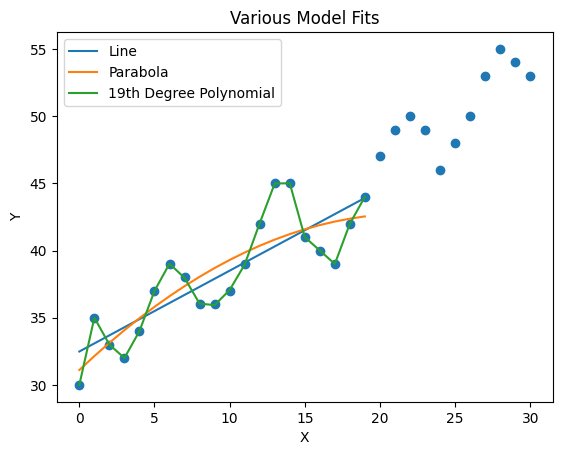

In [ ]:
# Split the data into training and test sets
X_train = X[:20]
Y_train = Y[:20]
X_test = X[20:]
Y_test = Y[20:]

# Fit a line to the training data
line_coeffs = np.polyfit(X_train, Y_train, 1)
line_fit = np.polyval(line_coeffs, X_train)
line_error_train = np.sqrt(np.mean((Y_train - line_fit)**2))
line_fit_test = np.polyval(line_coeffs, X_test)
line_error_test = np.sqrt(np.mean((Y_test - line_fit_test)**2))

# Fit a parabola to the training data
parabola_coeffs = np.polyfit(X_train, Y_train, 2)
parabola_fit = np.polyval(parabola_coeffs, X_train)
parabola_error_train = np.sqrt(np.mean((Y_train - parabola_fit)**2))
parabola_fit_test = np.polyval(parabola_coeffs, X_test)
parabola_error_test = np.sqrt(np.mean((Y_test - parabola_fit_test)**2))

# Fit a 19th degree polynomial to the training data
poly_coeffs = np.polyfit(X_train, Y_train, 19)
poly_fit = np.polyval(poly_coeffs, X_train)
poly_error_train = np.sqrt(np.mean((Y_train - poly_fit)**2))
poly_fit_test = np.polyval(poly_coeffs, X_test)
poly_error_test = np.sqrt(np.mean((Y_test - poly_fit_test)**2))

# Plot the data and the fitted models
plt.scatter(X, Y)
plt.title("Various Model Fits")
plt.xlabel("X")
plt.ylabel("Y")
plt.plot(X_train, line_fit, label='Line')
plt.plot(X_train, parabola_fit, label='Parabola')
plt.plot(X_train, poly_fit, label='19th Degree Polynomial')
plt.legend()

# Print the least square errors for each model on the training and test data
print('Training Errors:')
print('Line Error: {:.2f}'.format(line_error_train))
print('Parabola Error: {:.2f}'.format(parabola_error_train))
print('19th Degree Polynomial Error: {:.2f}'.format(poly_error_train))
print('\nTest Errors:')
print('Line Error: {:.2f}'.format(line_error_test))
print('Parabola Error: {:.2f}'.format(parabola_error_test))
print('19th Degree Polynomial Error: {:.2f}'.format(poly_error_test))

plt.show()

Part **iv**
---

/usr/local/lib/python3.9/dist-packages/IPython/core/interactiveshell.py:3553: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)


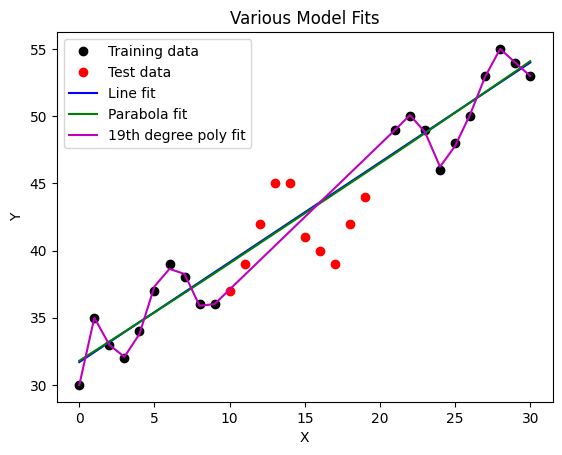

Training errors:
Line fit: 68.57
Parabola fit: 68.51
19th degree poly fit: 0.54

Test errors:
Line fit: 86.45
Parabola fit: 84.44
19th degree poly fit: 2575325.02


In [ ]:
# Split the data into training and testing data
X_train = np.concatenate((X[:10], X[-10:]))
Y_train = np.concatenate((Y[:10], Y[-10:]))
X_test = X[10:20]
Y_test = Y[10:20]

# Fit a line to the training data
coeffs_line = np.polyfit(X_train, Y_train, 1)
Y_fit_line_train = np.polyval(coeffs_line, X_train)
Y_fit_line_test = np.polyval(coeffs_line, X_test)
error_line_train = np.sum((Y_fit_line_train - Y_train)**2)
error_line_test = np.sum((Y_fit_line_test - Y_test)**2)

# Fit a parabola to the training data
coeffs_parabola = np.polyfit(X_train, Y_train, 2)
Y_fit_parabola_train = np.polyval(coeffs_parabola, X_train)
Y_fit_parabola_test = np.polyval(coeffs_parabola, X_test)
error_parabola_train = np.sum((Y_fit_parabola_train - Y_train)**2)
error_parabola_test = np.sum((Y_fit_parabola_test - Y_test)**2)

# Fit a 19th degree polynomial to the training data
coeffs_poly = np.polyfit(X_train, Y_train, 19)
Y_fit_poly_train = np.polyval(coeffs_poly, X_train)
Y_fit_poly_test = np.polyval(coeffs_poly, X_test)
error_poly_train = np.sum((Y_fit_poly_train - Y_train)**2)
error_poly_test = np.sum((Y_fit_poly_test - Y_test)**2)

# Plot the results
plt.title("Various Model Fits")
plt.xlabel("X")
plt.ylabel("Y")
plt.plot(X_train, Y_train, 'ko', label='Training data')
plt.plot(X_test, Y_test, 'ro', label='Test data')
plt.plot(X_train, Y_fit_line_train, 'b-', label='Line fit')
plt.plot(X_train, Y_fit_parabola_train, 'g-', label='Parabola fit')
plt.plot(X_train, Y_fit_poly_train, 'm-', label='19th degree poly fit')
plt.legend(loc='best')
plt.show()

# Print the errors
print("Training errors:")
print("Line fit: {:.2f}".format(error_line_train))
print("Parabola fit: {:.2f}".format(error_parabola_train))
print("19th degree poly fit: {:.2f}".format(error_poly_train))

print("\nTest errors:")
print("Line fit: {:.2f}".format(error_line_test))
print("Parabola fit: {:.2f}".format(error_parabola_test))
print("19th degree poly fit: {:.2f}".format(error_poly_test))


In question iii, the 19th degree polynomial has the lowest training error, but when tested on the held-out data, it has the highest error. The line and parabola have similar training errors, but the parabola has a slightly lower test error, indicating that it may generalize better to new data.

In question iv, using the first 10 and last 10 data points as training data leads to higher errors for all models, both in training and testing. However, the relative performance of the models is similar to that in question iii. The 19th degree polynomial still has the lowest training error, but the highest test error, while the parabola has a lower test error than the line.

Overall, it seems that the parabola is the best choice for this dataset, as it has a good balance between training and testing errors and is less likely to overfit than the 19th degree polynomial.